# Transforming images with DeepTrack
Juan C. Peña and Eberto Benjumea

## Object's information

There are two images of several objects with the same shape but different size. The squares and circles have a size of **30x30**, **20x20** or **10x10** pixels.
However, there are some sheared objects that have a size of **10x20** or **30x20** pixels.

## Libraries and functions

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
!pip install deeptrack

In [ ]:
import deeptrack as dt

from deeptrack.augmentations import Affine
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Experiment 1: Squares

In [5]:
path_squares = '/content/drive/MyDrive/Investigacion/Data/synthetics/sinteticav5_squares_noisy.png'

(1026, 1281, 3)


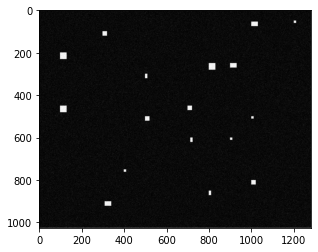

In [6]:
imgray_squares = dt.LoadImage(path_squares)()._value / 256
im3_squares = cv2.merge((imgray_squares,imgray_squares,imgray_squares))
plt.imshow(im3_squares)
print(im3_squares.shape)

(1026, 1281)


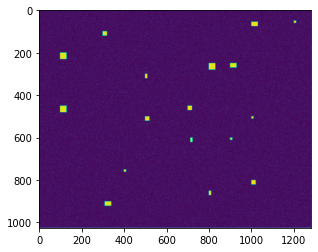

In [7]:
im_squares = dt.LoadImage(path_squares)()._value[:,:,0] / 256
plt.imshow(im_squares)
print(im_squares.shape)

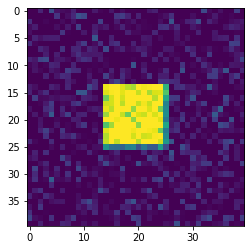

In [8]:
x, y, w = (385, 736, 40)
im_square = im_squares[y:y+w, x:x+w]
plt.imshow(im_square)

In [10]:
# Transformation's object
transformation = Affine()

# Initial conditions
init_traslation = [0,0]
init_rotation = 0
init_scaling = [1,1]
init_shearing = 0

# Transformations
tr = lambda: [np.random.randn() * 2] * 2
rt = lambda: np.random.rand() * 2 * np.pi * 2
sc = lambda: [np.random.uniform(low=0.5, high=2)] * 2
sh = lambda: np.random.rand() * np.pi/4

[-0.007334215256977881, -0.007334215256977881]


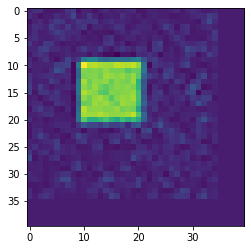

In [97]:
# Traslation
print(tr())
plt.imshow(transformation.get(im_square, init_scaling, tr(), init_rotation, init_shearing))

10.039377104258678


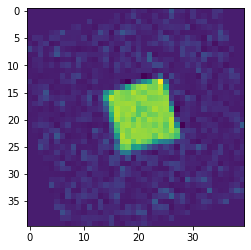

In [14]:
# Rotation
print(rt())
plt.imshow(transformation.get(im_square, init_scaling, init_traslation, rt(), init_shearing))

[1.524461815003617, 1.524461815003617]


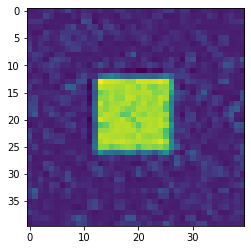

In [95]:
# Scaling
print(sc())
plt.imshow(transformation.get(im_square, sc(), init_traslation, init_rotation, init_shearing))

0.16777882152286863


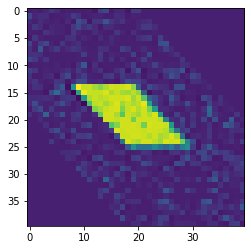

In [23]:
# Shearing
print(sh())
plt.imshow(transformation.get(im_square, init_scaling, init_traslation, init_rotation, sh()))

## Experiment 2: Circles

In [99]:
path_circles = '/content/drive/MyDrive/Investigacion/Data/synthetics/sinteticav5_circles_noisy.png'

(1026, 1281, 3)


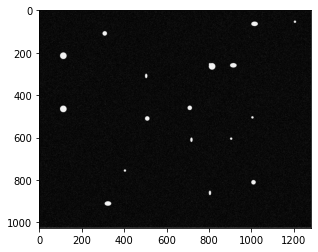

In [100]:
imgray_circles = dt.LoadImage(path_circles)()._value / 256
im_circles = cv2.merge((imgray_circles,imgray_circles,imgray_circles))
plt.imshow(im_circles)
print(im_circles.shape)

(1026, 1281)


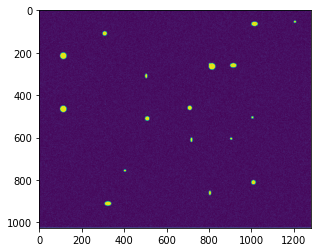

In [101]:
im_circles = dt.LoadImage(path_circles)()._value[:,:,0] / 256
plt.imshow(im_circles)
print(im_circles.shape)

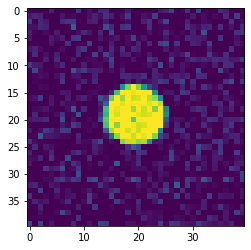

In [102]:
x, y, w = (385, 736, 40)
im_circle = im_circles[y:y+w, x:x+w]
plt.imshow(im_circle)

[-4.421996211579453, -4.421996211579453]


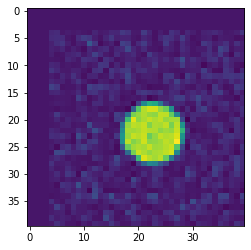

In [108]:
# Traslation
print(tr())
plt.imshow(transformation.get(im_circle, init_scaling, tr(), init_rotation, init_shearing))

4.8222630220055045


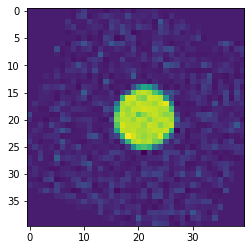

In [109]:
# Rotation
print(rt())
plt.imshow(transformation.get(im_circle, init_scaling, init_traslation, rt(), init_shearing))

[1.817927355359671, 1.817927355359671]


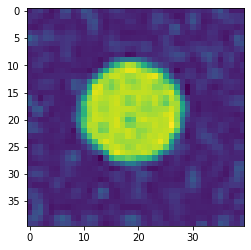

In [110]:
# Scaling
print(sc())
plt.imshow(transformation.get(im_circle, sc(), init_traslation, init_rotation, init_shearing))

0.2383594146401988


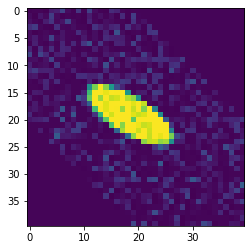

In [111]:
# Shearing
print(sh())
plt.imshow(transformation.get(im_circle, init_scaling, init_traslation, init_rotation, sh()))

## Objects' description

### 10 x 10 objects

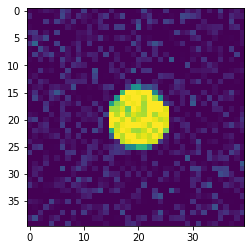

In [140]:
plt.imshow(im_circles[35:35+40, 1185:1185+40]) # 10x10

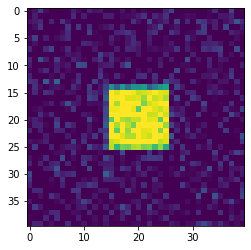

In [153]:
plt.imshow(im_squares[35:35+40, 1185:1185+40]) # 10x10

### 20x20 objects

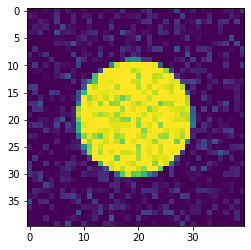

In [135]:
plt.imshow(im_circles[90:90+40, 290:290+40]) # 20x20

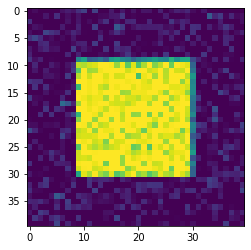

In [154]:
plt.imshow(im_squares[90:90+40, 290:290+40]) # 20x20

### 30x30 objects

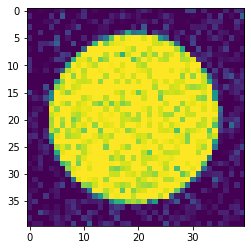

In [131]:
plt.imshow(im_circles[195:195+40, 95:95+40]) # 30x30

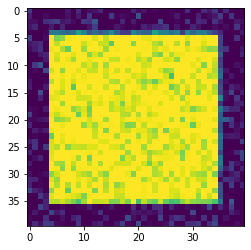

In [155]:
plt.imshow(im_squares[195:195+40, 95:95+40]) # 30x30

### 10x20 Objects

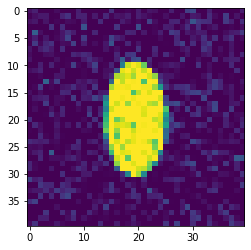

In [146]:
plt.imshow(im_circles[290:290+40, 485:485+40]) # 10x20

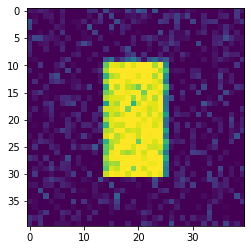

In [156]:
plt.imshow(im_squares[290:290+40, 485:485+40]) # 10x20

### 30x20 Objects

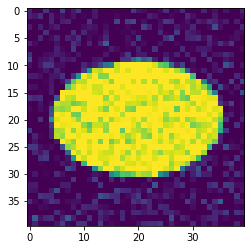

In [151]:
plt.imshow(im_circles[240:240+40, 895:895+40]) # 30x20

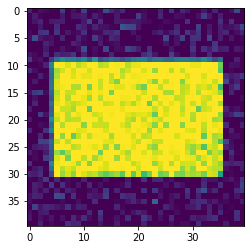

In [157]:
plt.imshow(im_squares[240:240+40, 895:895+40]) # 30x20

## Transformator

In [193]:
def menu():

  # Objects' dictionary
  objects = {'1':{'1': im_squares[35:35+40, 1185:1185+40],
                  '2': im_squares[90:90+40, 290:290+40],
                  '3': im_squares[195:195+40, 95:95+40],
                  '4': im_squares[290:290+40, 485:485+40],
                  '5': im_squares[240:240+40, 895:895+40]
                  },
              '2':{'1': im_circles[35:35+40, 1185:1185+40],
                  '2': im_circles[90:90+40, 290:290+40],
                  '3': im_circles[195:195+40, 95:95+40],
                  '4': im_circles[290:290+40, 485:485+40],
                  '5': im_circles[240:240+40, 895:895+40]
                  }
              }

  # Initial conditions
  tr = [0,0]
  rt = 0
  sc = [1,1]
  sh = 0
  
  # Image selection
  print("\n What do you want to transform? \n 1- Square \n 2- Circle")
  shape = str(input(" Answer: "))

  print("\n What size? \n 1- 10x10 \n 2- 20x20 \n 3- 30x30 \n 4- 10x20 \n 5- 30x20")
  size = str(input(" Answer: "))

  image = objects[shape][size]
  
  op = 0

  while(op < 5):

    # Options
    print("\nTransformation menu \n")
    print("1. Apply rotation")
    print("2. Apply traslation")
    print("3. Apply scaling")
    print("4. Apply shearing")
    print("5. Show transformed image")

    op = int(input("\n What do you want to do? : "))

    # Rotation
    if(op == 1):
      print("\nApplying rotation")
      transf = lambda: np.random.rand() * 2 * np.pi * 2
      rt = transf() 
      print("Rotation: ", rt)

    # Traslation
    if(op == 2):
      print("\nApplying translation")
      transf = lambda: [np.random.randn() * 2] * 2
      tr = transf()
      print("Translation: ", tr)

    # Scaling
    if(op == 3):
      print("\nApplying scaling")
      transf = lambda: [np.random.uniform(low=0.5, high=2)] * 2
      sc = transf()
      print("Scaling: ", sc)

    # Shearing
    if(op == 4):
      print("\nApplying shearing")
      transf = lambda: np.random.rand() * np.pi/4
      sh = transf()
      print("Shearing: ", sh)

    # Show transformed image
    if(op == 5):
      print("\nRotation: ", rt)
      print("Translation: ", tr)
      print("Scaling: ", sc)
      print("Shearing: ", sh)
      print("\nProcess completed \n")
      plt.imshow(transformation.get(image, sc, tr, rt, sh))


 What do you want to transform? 
 1- Square 
 2- Circle
 Answer: 1

 What size? 
 1- 10x10 
 2- 20x20 
 3- 30x30 
 4- 10x20 
 5- 30x20
 Answer: 1

Transformation menu 

1. Apply rotation
2. Apply traslation
3. Apply scaling
4. Apply shearing
5. Show transformed image

 What do you want to do? : 1

Applying rotation
Rotation:  4.837252908122829

Transformation menu 

1. Apply rotation
2. Apply traslation
3. Apply scaling
4. Apply shearing
5. Show transformed image

 What do you want to do? : 2

Applying translation
Translation:  [1.5030193280154496, 1.5030193280154496]

Transformation menu 

1. Apply rotation
2. Apply traslation
3. Apply scaling
4. Apply shearing
5. Show transformed image

 What do you want to do? : 3

Applying scaling
Scaling:  [1.775699108371362, 1.775699108371362]

Transformation menu 

1. Apply rotation
2. Apply traslation
3. Apply scaling
4. Apply shearing
5. Show transformed image

 What do you want to do? : 4

Applying shearing
Shearing:  0.20298586218855036

Tr

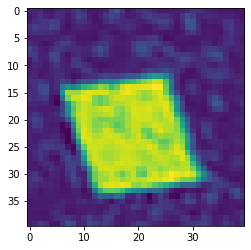

In [194]:
menu()


 What do you want to transform? 
 1- Square 
 2- Circle
 Answer: 2

 What size? 
 1- 10x10 
 2- 20x20 
 3- 30x30 
 4- 10x20 
 5- 30x20
 Answer: 1

Transformation menu 

1. Apply rotation
2. Apply traslation
3. Apply scaling
4. Apply shearing
5. Show transformed image

 What do you want to do? : 1

Applying rotation
Rotation:  7.214794058563617

Transformation menu 

1. Apply rotation
2. Apply traslation
3. Apply scaling
4. Apply shearing
5. Show transformed image

 What do you want to do? : 2

Applying translation
Translation:  [-0.7598966235790103, -0.7598966235790103]

Transformation menu 

1. Apply rotation
2. Apply traslation
3. Apply scaling
4. Apply shearing
5. Show transformed image

 What do you want to do? : 3

Applying scaling
Scaling:  [1.4081222578543744, 1.4081222578543744]

Transformation menu 

1. Apply rotation
2. Apply traslation
3. Apply scaling
4. Apply shearing
5. Show transformed image

 What do you want to do? : 4

Applying shearing
Shearing:  0.11957783099396414

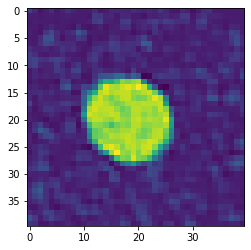

In [195]:
menu()